<a href="https://colab.research.google.com/github/chidao87/Chi-/blob/main/StudentPerformance_ML_groupproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**DATA SELECTION**

**Step 1: Load the dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


# Read the CSV file into a Pandas DataFrame
# A DataFrame in Pandas is a two-dimensional, labeled data structure with columns of potentially different types.
data = pd.read_csv('Student_Performance.csv')

# Define predictor variables (Hours Studied, Previous Scores, Extracurricular Activities, Sleep Hours, and Sample Questions Papers Practices) and target variable (Performance Index)
X = data.drop(columns=['Performance Index'])
y = data['Performance Index']



print(data) # Display the first few rows of the dataset


      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0               7.0             99.0                        Yes          9.0   
1               4.0             82.0                         No          4.0   
2               8.0             51.0                        Yes          7.0   
3               5.0             52.0                        Yes          5.0   
4               7.0             75.0                         No          8.0   
...             ...              ...                        ...          ...   
9995            1.0             49.0                        Yes          4.0   
9996            7.0             64.0                        Yes          8.0   
9997            6.0             83.0                        Yes          8.0   
9998            9.0             97.0                        Yes          7.0   
9999            7.0             74.0                         No          8.0   

      Sample Question Papers Practiced 

In [ ]:
print("\nData Information")
print(data.info())

print("\nData Describe")

data.describe()


Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9997 non-null   float64
 1   Previous Scores                   9995 non-null   float64
 2   Extracurricular Activities        9997 non-null   object 
 3   Sleep Hours                       9995 non-null   float64
 4   Sample Question Papers Practiced  9996 non-null   float64
 5   Performance Index                 9999 non-null   float64
dtypes: float64(5), object(1)
memory usage: 468.9+ KB
None

Data Describe


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9997.000000,9995.000000,9995.000000,9996.000000,9999.000000
mean,4.992398,69.441921,6.530265,4.583233,55.224022
std,2.589136,17.342796,1.696020,2.867592,19.213361
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


**DATA CLEANING**

**Step 2: Identify Missing Values**

In [ ]:
# Identify missing values
missing_values = data.isnull().sum()
print("Missing values before imputation:")
print(missing_values)

Missing values before imputation:
Hours Studied                       3
Previous Scores                     5
Extracurricular Activities          3
Sleep Hours                         5
Sample Question Papers Practiced    4
Performance Index                   1
dtype: int64



**Step 2-1: Remove Rows or Columns with High Percentage of Missing Values**

In [ ]:
# Remove rows with more than 60% missing values
# data.shape[1] gets the number of columns in the DataFrame
data_removed = data.dropna(thresh=data.shape[1] * 0.6)

# Show rows affected by removal
removed_rows = data[~data.index.isin(data_removed.index)]
print("Rows removed due to high percentage of missing values:")
print(removed_rows)

print("Data information after removal:")
data_removed.info()

Rows removed due to high percentage of missing values:
    Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
94            5.0             82.0                        NaN          NaN   
95            3.0             48.0                        NaN          NaN   

    Sample Question Papers Practiced  Performance Index  
94                               NaN               69.0  
95                               NaN               30.0  
Data information after removal:
<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9995 non-null   float64
 1   Previous Scores                   9993 non-null   float64
 2   Extracurricular Activities        9997 non-null   object 
 3   Sleep Hours                       9995 non-null   float64
 4   Sample Question Pape

**Step 2-2: Impute Missing Values with Mean Value**

In [ ]:
# Impute missing values with the mean value
data_imputed = data_removed.copy()

# Convert 'Hours Studied' to numeric, handling errors
# errors='coerce' tells to convert non-numeric values (like strings or missing values) to NaN (Not a Number). This prevents errors during the conversion process.
data_imputed['Hours Studied'] = pd.to_numeric(data_imputed['Hours Studied'], errors='coerce')
# Convert 'Previous Scores' to numeric, handling errors
data_imputed['Previous Scores'] = pd.to_numeric(data_imputed['Previous Scores'], errors='coerce') # Convert 'Previous Scores' column to numeric
# Convert 'Sleep Hours' to numeric, handling errors
data_imputed['Sleep Hours'] = pd.to_numeric(data_imputed['Sleep Hours'], errors='coerce')
# Convert 'Sample Question Papers Practiced' to numeric, handling errors
data_imputed['Sample Question Papers Practiced'] = pd.to_numeric(data_imputed['Sample Question Papers Practiced'], errors='coerce')
# Convert 'Performance Index' to numeric, handling errors
data_imputed['Performance Index'] = pd.to_numeric(data_imputed['Performance Index'], errors='coerce')

mean_studyhrs = data_imputed['Hours Studied'].mean()
mean_score = data_imputed['Previous Scores'].mean()
mean_sleephrs = data_imputed['Sleep Hours'].mean()
mean_practice = data_imputed['Sample Question Papers Practiced'].mean()
mean_performance = data_imputed['Performance Index'].mean()


# Show rows with missing values before imputation, axis=1 means a column
missing_before = data_imputed[data_imputed.isnull().any(axis=1)]
print("Rows with missing values before imputation:")
print(missing_before)

# Impute missing values
data_imputed['Hours Studied'].fillna(mean_studyhrs, inplace=True)
data_imputed['Previous Scores'].fillna(mean_score, inplace=True)
data_imputed['Sleep Hours'].fillna(mean_sleephrs, inplace=True)
data_imputed['Sample Question Papers Practiced'].fillna(mean_practice, inplace=True)
data_imputed['Performance Index'].fillna(mean_performance, inplace=True)
data_imputed['Extracurricular Activities'].fillna(method='ffill', inplace=True)


# Show rows with missing values after imputation
missing_after = data_imputed[data_imputed.isnull().any(axis=1)]
print("Rows with missing values after imputation:")
print(missing_after)
print("Data information after imputation:")
data_imputed.info()

Rows with missing values before imputation:
     Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
12             3.0             47.0                        NaN          9.0   
19             5.0              NaN                         No          7.0   
27             NaN             84.0                        Yes          NaN   
28             NaN             94.0                        Yes          NaN   
96             8.0              NaN                         No          5.0   
97             6.0              NaN                        Yes          6.0   
98             3.0              NaN                        Yes          5.0   
138            9.0             45.0                        Yes          NaN   
142            NaN              NaN                         No          8.0   

     Sample Question Papers Practiced  Performance Index  
12                                NaN               27.0  
19                                0.0          

<ipython-input-6-7167df838e18>:34: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_imputed['Extracurricular Activities'].fillna(method='ffill', inplace=True)


**Step 2-3: Save the cleaned dataset to a new CSV file**

In [ ]:
# Save the cleaned dataset to a CSV file
data_imputed.to_csv('data_cleaned.csv', index=False) # Set index=False to avoid including the index in the CSV file
# Download the created CSV file
files.download('data_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

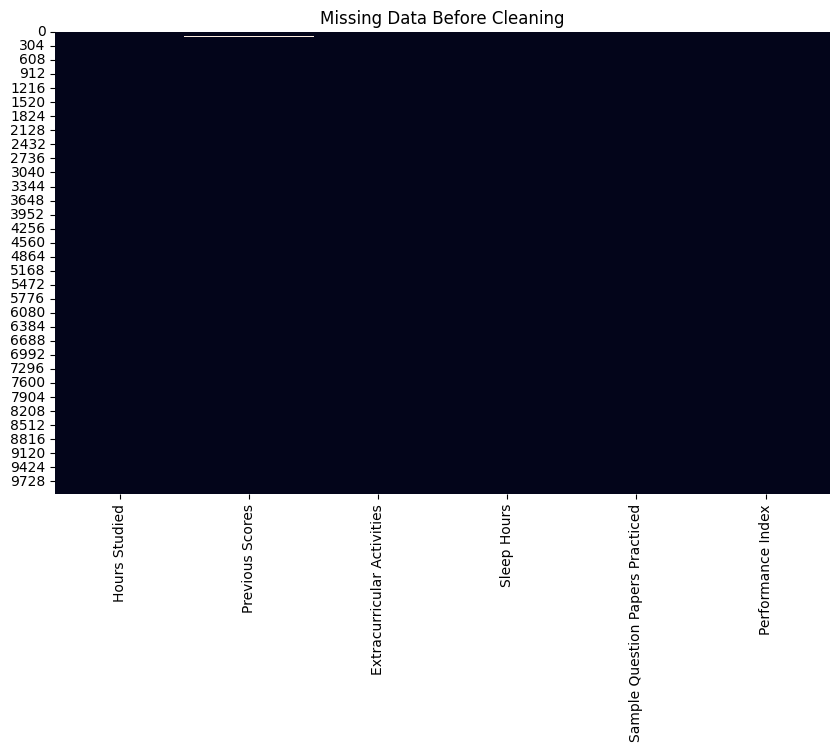

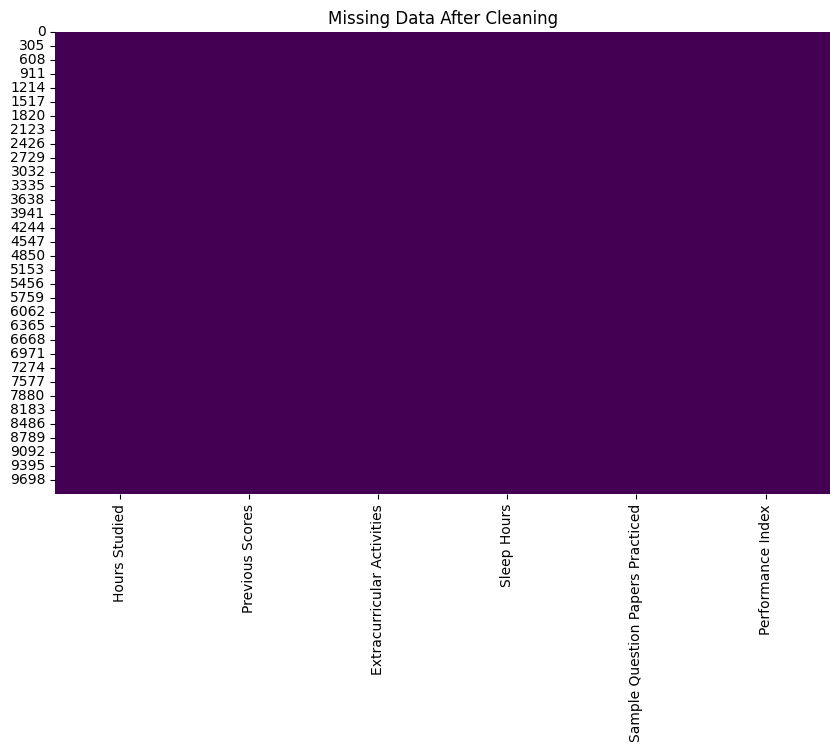

In [ ]:
# Visualize missing data before cleaning
# This line creates a new Matplotlib figure with a specified size of 10 inches in width and 6 inches in height
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False)
plt.title('Missing Data Before Cleaning')
plt.show()

# Visualize missing data after cleaning
plt.figure(figsize=(10, 6))
sns.heatmap(data_imputed.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data After Cleaning')
plt.show()

**Step 3: Identify Categorical Columns and Apply Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for 'Extracurricular Activities' column
# The LabelEncoder assigns numerical labels based on the alphabetical order of the categories by default.
label_encoder = LabelEncoder()
data_encoded = data_imputed.copy() # Create a copy of the DataFrame
data_encoded['Extracurricular Activities'] = label_encoder.fit_transform(data_encoded['Extracurricular Activities'])

print("\nDataset after Label Encoding:\n", data_encoded.head())


# Save the encoded dataset to a new CSV file
# index=False tells Pandas to not include the DataFrame's index (row labels) in the CSV file.
data_encoded.to_csv('data_encoded.csv', index=False)

print("\nEncoded dataset saved to 'data_encoded.csv'")
files.download('data_encoded.csv')

print("Data information after label encoding:")
data_encoded.info()


Dataset after Label Encoding:
    Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0            7.0             99.0                           1          9.0   
1            4.0             82.0                           0          4.0   
2            8.0             51.0                           1          7.0   
3            5.0             52.0                           1          5.0   
4            7.0             75.0                           0          8.0   

   Sample Question Papers Practiced  Performance Index  
0                               1.0               91.0  
1                               2.0               65.0  
2                               2.0               45.0  
3                               2.0               36.0  
4                               5.0               66.0  

Encoded dataset saved to 'data_encoded.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Data information after label encoding:
<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9998 non-null   float64
 1   Previous Scores                   9998 non-null   float64
 2   Extracurricular Activities        9998 non-null   int64  
 3   Sleep Hours                       9998 non-null   float64
 4   Sample Question Papers Practiced  9998 non-null   float64
 5   Performance Index                 9998 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 546.8 KB


**Step 4: Common Feature Scaling Techniques**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler

# Separate the features for scaling, EXCLUDING the header
features = data_encoded[['Hours Studied', 'Previous Scores','Sleep Hours','Sample Question Papers Practiced','Performance Index']].values

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
features_min_max_scaled = min_max_scaler.fit_transform(features)
data_min_max_scaled = data_encoded.copy()
data_min_max_scaled[['Hours Studied', 'Previous Scores','Sleep Hours','Sample Question Papers Practiced','Performance Index']] = features_min_max_scaled

# Standardization
standard_scaler = StandardScaler()
features_standard_scaled = standard_scaler.fit_transform(features)
data_standard_scaled = data_encoded.copy()
data_standard_scaled[['Hours Studied', 'Previous Scores','Sleep Hours','Sample Question Papers Practiced','Performance Index']] = features_standard_scaled

# Robust Scaling
robust_scaler = RobustScaler()
features_robust_scaled = robust_scaler.fit_transform(features)
data_robust_scaled = data_encoded.copy()
data_robust_scaled[['Hours Studied', 'Previous Scores','Sleep Hours','Sample Question Papers Practiced','Performance Index']] = features_robust_scaled

# MaxAbs Scaling
max_abs_scaler = MaxAbsScaler()
features_max_abs_scaled = max_abs_scaler.fit_transform(features)
data_max_abs_scaled = data_encoded.copy()
data_max_abs_scaled[['Hours Studied', 'Previous Scores','Sleep Hours','Sample Question Papers Practiced','Performance Index']] = features_max_abs_scaled

# Display the scaled datasets
print("Original Dataset:\n", data.head())
print("\nMin-Max Scaled Dataset:\n", data_min_max_scaled.head())
print("\nStandardized Dataset:\n", data_standard_scaled.head())
print("\nRobust Scaled Dataset:\n", data_robust_scaled.head())
print("\nMaxAbs Scaled Dataset:\n", data_max_abs_scaled.head())

# Save the encoded datasets to new CSV files
data_min_max_scaled.to_csv('min_max_scaled_data.csv', index=False)
data_standard_scaled.to_csv('standard_scaled_data.csv', index=False)
data_robust_scaled.to_csv('robust_scaled_data.csv', index=False)
data_max_abs_scaled.to_csv('max_abs_scaled_data.csv', index=False)

print("\nScaled datasets saved to CSV files.")

Original Dataset:
    Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0            7.0             99.0                        Yes          9.0   
1            4.0             82.0                         No          4.0   
2            8.0             51.0                        Yes          7.0   
3            5.0             52.0                        Yes          5.0   
4            7.0             75.0                         No          8.0   

   Sample Question Papers Practiced  Performance Index  
0                               1.0               91.0  
1                               2.0               65.0  
2                               2.0               45.0  
3                               2.0               36.0  
4                               5.0               66.0  

Min-Max Scaled Dataset:
    Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0          0.750         1.000000                           1          1

**Step 5: Remove Outliers**

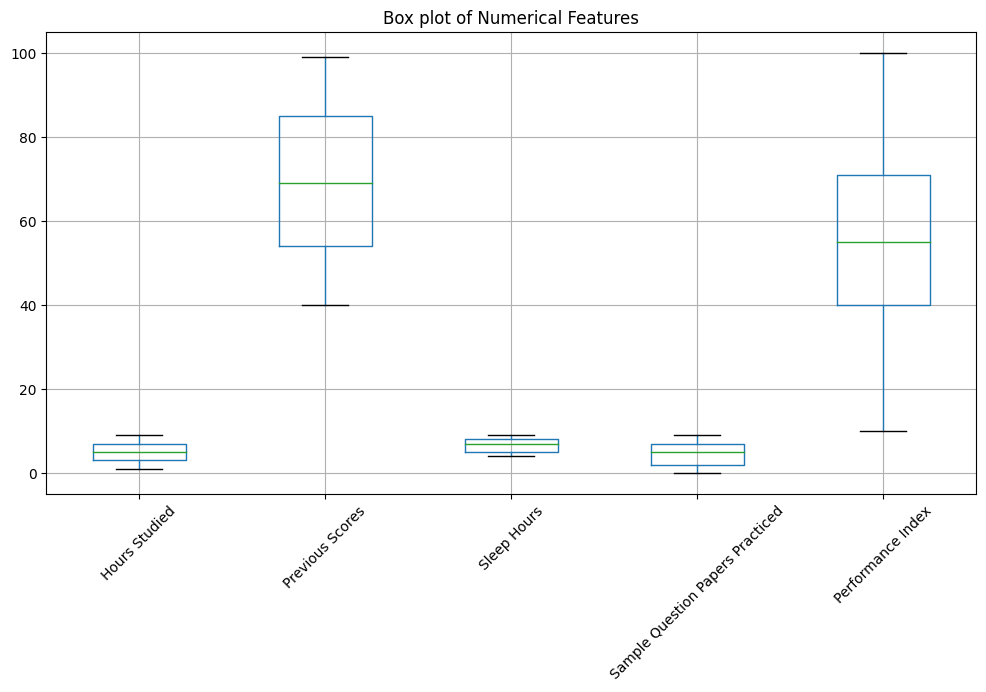

ValueError: num must be an integer with 1 <= num <= 4, not 5

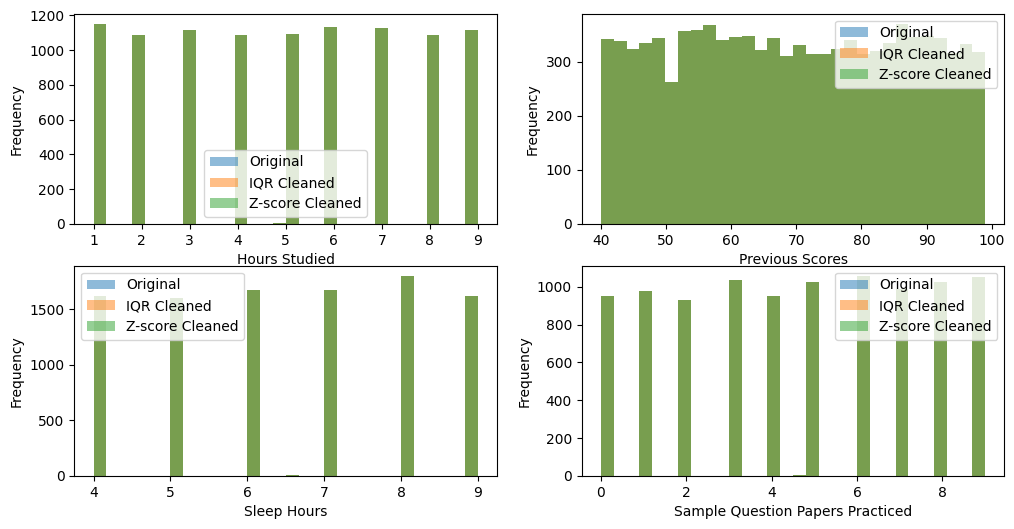

In [ ]:
from scipy import stats # Import the stats module from scipy
# Identify numerical columns (excluding 'Extracurricular Activities' which is categorical despite encoding)
numerical_features = data_encoded.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('Extracurricular Activities')  # Remove 'Extracurricular Activities' from the list

# Step 1: Identify Outliers
# Visualize outliers using box plots
plt.figure(figsize=(12, 6))
data_encoded[numerical_features].boxplot() # Use the updated numerical_features
plt.title('Box plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

# Step 2: Remove Outliers using IQR and Z-score methods
# IQR Method
Q1 = data_encoded[numerical_features].quantile(0.25)
Q3 = data_encoded[numerical_features].quantile(0.75)
IQR = Q3 - Q1
# Use the correct DataFrame 'data_encoded' consistently
data_iqr_cleaned = data_encoded[~((data_encoded[numerical_features] < (Q1 - 1.5 * IQR)) | (data_encoded[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Z-score Method
z_scores = np.abs(stats.zscore(data_encoded[numerical_features])) # Use the updated numerical_features
threshold = 3 # Adjust the threshold as needed
data_zscore_cleaned = data_encoded[(z_scores < threshold).all(axis=1)]

# Step 3: Comparison - Histograms
plt.figure(figsize=(12, 6))

for i, feature in enumerate(numerical_features):
    plt.subplot(2, len(numerical_features)//2, i + 1)
    plt.hist(data_encoded[feature], bins=30, alpha=0.5, label='Original')
    plt.hist(data_iqr_cleaned[feature], bins=30, alpha=0.5, label='IQR Cleaned')
    plt.hist(data_zscore_cleaned[feature], bins=30, alpha=0.5, label='Z-score Cleaned')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

# Step 4: Save Cleaned Data
data_iqr_cleaned.to_csv('data_iqr_cleaned.csv', index=False)
data_zscore_cleaned.to_csv('data_zscore_cleaned.csv', index=False)

print("Cleaned datasets saved to 'data_iqr_cleaned.csv' and 'data_zscore_cleaned.csv'")
print("Datainformation after Removing Outliers")
data_zscore_cleaned.info()
data_iqr_cleaned.info()


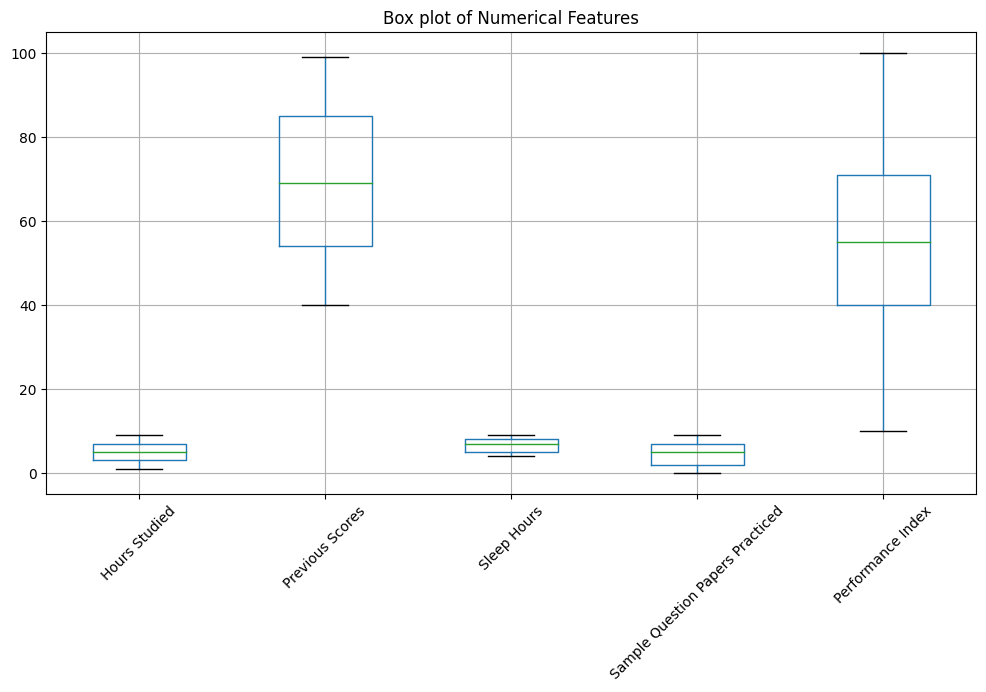

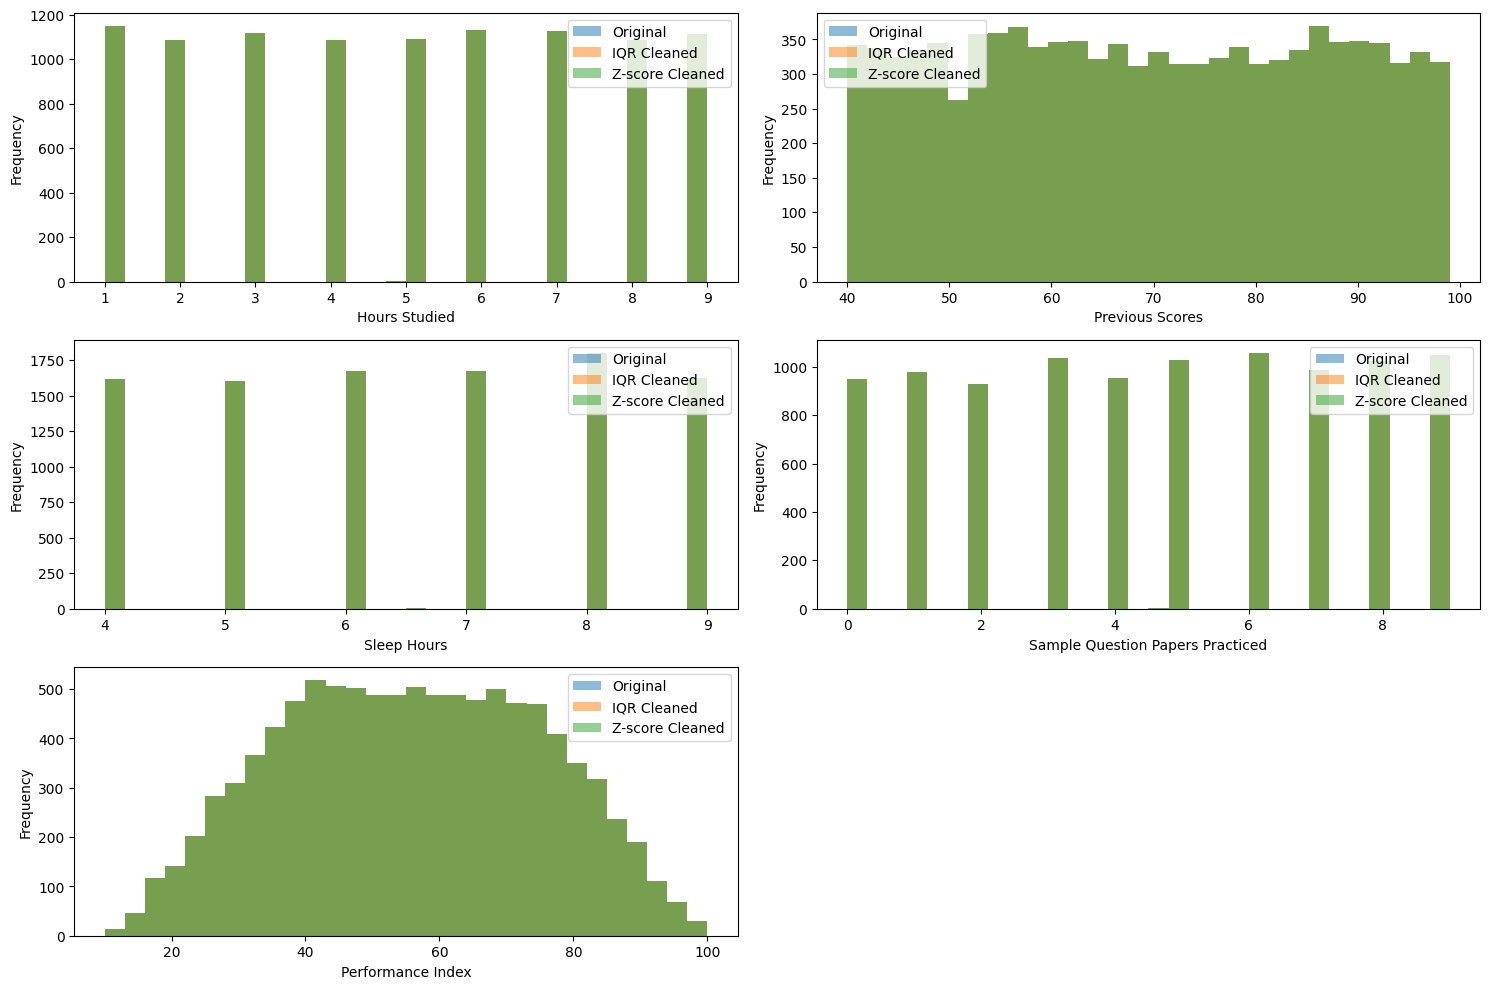

Cleaned datasets saved to 'data_iqr_cleaned.csv' and 'data_zscore_cleaned.csv'
Datainformation after Removing Outliers
<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9998 non-null   float64
 1   Previous Scores                   9998 non-null   float64
 2   Extracurricular Activities        9998 non-null   int64  
 3   Sleep Hours                       9998 non-null   float64
 4   Sample Question Papers Practiced  9998 non-null   float64
 5   Performance Index                 9998 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 546.8 KB
<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----

In [ ]:
from scipy import stats # Import the stats module from scipy
# Identify numerical columns (excluding 'Extracurricular Activities' which is categorical despite encoding)
numerical_features = data_encoded.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('Extracurricular Activities')  # Remove 'Extracurricular Activities' from the list

# Step 1: Identify Outliers
# Visualize outliers using box plots
plt.figure(figsize=(12, 6))
data_encoded[numerical_features].boxplot() # Use the updated numerical_features
plt.title('Box plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

# Step 2: Remove Outliers using IQR and Z-score methods
# IQR Method
Q1 = data_encoded[numerical_features].quantile(0.25)
Q3 = data_encoded[numerical_features].quantile(0.75)
IQR = Q3 - Q1
# Use the correct DataFrame 'data_encoded' consistently
data_iqr_cleaned = data_encoded[~((data_encoded[numerical_features] < (Q1 - 1.5 * IQR)) | (data_encoded[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Z-score Method
z_scores = np.abs(stats.zscore(data_encoded[numerical_features])) # Use the updated numerical_features
threshold = 3 # Adjust the threshold as needed
data_zscore_cleaned = data_encoded[(z_scores < threshold).all(axis=1)]

# Step 3: Comparison - Histograms
# Adjust the subplot layout to accommodate all features
num_rows = 3 # Increase the number of rows to 3
num_cols = (len(numerical_features) + num_rows - 1) // num_rows # Calculate columns to fit all features
plt.figure(figsize=(15, 10)) # Adjust figure size for better visualization

for i, feature in enumerate(numerical_features):
    plt.subplot(num_rows, num_cols, i + 1) # Use adjusted number of rows and columns
    plt.hist(data_encoded[feature], bins=30, alpha=0.5, label='Original')
    plt.hist(data_iqr_cleaned[feature], bins=30, alpha=0.5, label='IQR Cleaned')
    plt.hist(data_zscore_cleaned[feature], bins=30, alpha=0.5, label='Z-score Cleaned')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

# Step 4: Save Cleaned Data
data_iqr_cleaned.to_csv('data_iqr_cleaned.csv', index=False)
data_zscore_cleaned.to_csv('data_zscore_cleaned.csv', index=False)

print("Cleaned datasets saved to 'data_iqr_cleaned.csv' and 'data_zscore_cleaned.csv'")
print("Datainformation after Removing Outliers")
data_zscore_cleaned.info()
data_iqr_cleaned.info()

**Step 6: Apply Feature Scaling Techniques After Removing Outliers by IQR**

Original Dataset:
    Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0            7.0             99.0                        Yes          9.0   
1            4.0             82.0                         No          4.0   
2            8.0             51.0                        Yes          7.0   
3            5.0             52.0                        Yes          5.0   
4            7.0             75.0                         No          8.0   

   Sample Question Papers Practiced  Performance Index  
0                               1.0               91.0  
1                               2.0               65.0  
2                               2.0               45.0  
3                               2.0               36.0  
4                               5.0               66.0  

Min-Max Scaled Dataset:
    Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0          0.750         1.000000                           1          1

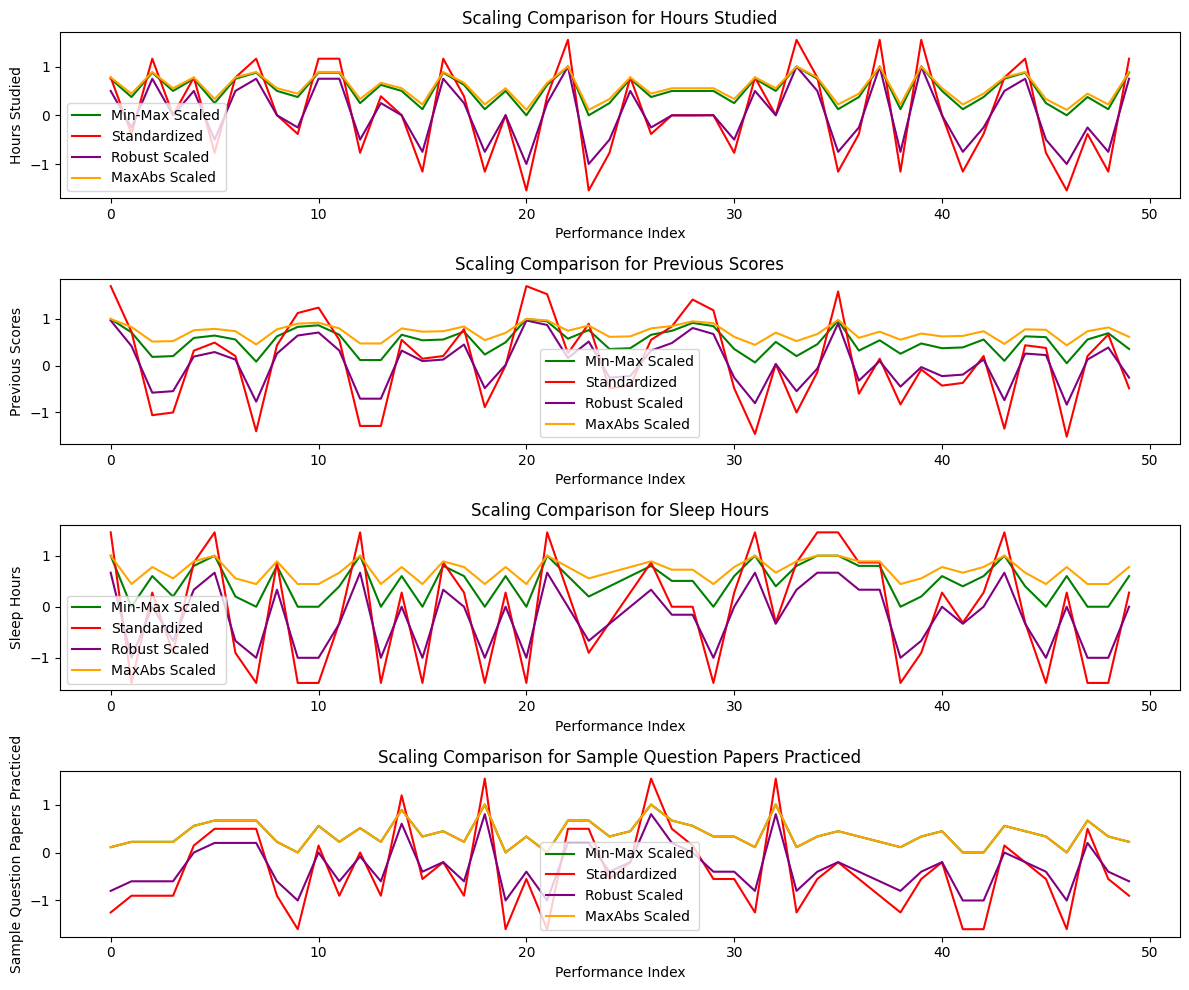

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler

# Separate the features for scaling, EXCLUDING the header
features = data_iqr_cleaned[['Hours Studied', 'Previous Scores','Sleep Hours','Sample Question Papers Practiced','Performance Index']].values

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
features_min_max_scaled = min_max_scaler.fit_transform(features)
data_min_max_scaled = data_iqr_cleaned.copy()
data_min_max_scaled[['Hours Studied', 'Previous Scores','Sleep Hours','Sample Question Papers Practiced','Performance Index']] = features_min_max_scaled

# Standardization
standard_scaler = StandardScaler()
features_standard_scaled = standard_scaler.fit_transform(features)
data_standard_scaled = data_iqr_cleaned.copy()
data_standard_scaled[['Hours Studied', 'Previous Scores','Sleep Hours','Sample Question Papers Practiced','Performance Index']] = features_standard_scaled

# Robust Scaling
robust_scaler = RobustScaler()
features_robust_scaled = robust_scaler.fit_transform(features)
data_robust_scaled = data_iqr_cleaned.copy()
data_robust_scaled[['Hours Studied', 'Previous Scores','Sleep Hours','Sample Question Papers Practiced','Performance Index']] = features_robust_scaled

# MaxAbs Scaling
max_abs_scaler = MaxAbsScaler()
features_max_abs_scaled = max_abs_scaler.fit_transform(features)
data_max_abs_scaled = data_iqr_cleaned.copy()
data_max_abs_scaled[['Hours Studied', 'Previous Scores','Sleep Hours','Sample Question Papers Practiced','Performance Index']] = features_max_abs_scaled

# Display the scaled datasets
print("Original Dataset:\n", data.head())
print("\nMin-Max Scaled Dataset:\n", data_min_max_scaled.head())
print("\nStandardized Dataset:\n", data_standard_scaled.head())
print("\nRobust Scaled Dataset:\n", data_robust_scaled.head())
print("\nMaxAbs Scaled Dataset:\n", data_max_abs_scaled.head())

# Save the encoded datasets to new CSV files
data_min_max_scaled.to_csv('min_max_scaled_data.csv', index=False)
data_standard_scaled.to_csv('standard_scaled_data.csv', index=False)
data_robust_scaled.to_csv('robust_scaled_data.csv', index=False)
data_max_abs_scaled.to_csv('max_abs_scaled_data.csv', index=False)

print("\nScaled datasets saved to CSV files.")

# Plotting
samples=50
fig, axs = plt.subplots(4, 1, figsize=(12, 10))

# Plot for "Hours Studied"
# Convert index to a list for numerical plotting
x_values = list(data_iqr_cleaned.index[:samples])
# axs[0].plot(x_values, data_encoded['Hours Studied'], label='Original', color='blue')
axs[0].plot(x_values, data_min_max_scaled['Hours Studied'][:samples], label='Min-Max Scaled', color='green')
axs[0].plot(x_values, data_standard_scaled['Hours Studied'][:samples], label='Standardized', color='red')
axs[0].plot(x_values, data_robust_scaled['Hours Studied'][:samples], label='Robust Scaled', color='purple')
axs[0].plot(x_values, data_max_abs_scaled['Hours Studied'][:samples], label='MaxAbs Scaled', color='orange')
axs[0].set_title('Scaling Comparison for Hours Studied')
axs[0].set_xlabel('Performance Index')
axs[0].set_ylabel('Hours Studied')
axs[0].legend()
# Plot for "Previous Scores"
# axs[1].plot(x_values, data_encoded['Previous Scores'], label='Original', color='blue')
axs[1].plot(x_values, data_min_max_scaled['Previous Scores'][:samples], label='Min-Max Scaled', color='green')
axs[1].plot(x_values, data_standard_scaled['Previous Scores'][:samples], label='Standardized', color='red')
axs[1].plot(x_values, data_robust_scaled['Previous Scores'][:samples], label='Robust Scaled', color='purple')
axs[1].plot(x_values, data_max_abs_scaled['Previous Scores'][:samples], label='MaxAbs Scaled', color='orange')
axs[1].set_title('Scaling Comparison for Previous Scores')
axs[1].set_xlabel('Performance Index')
axs[1].set_ylabel('Previous Scores')
axs[1].legend()

# Plot for "Sleep Hours"
# axs[2].plot(x_values, data_encoded['Sleep Hours'], label='Original', color='blue')
axs[2].plot(x_values, data_min_max_scaled['Sleep Hours'][:samples], label='Min-Max Scaled', color='green')
axs[2].plot(x_values, data_standard_scaled['Sleep Hours'][:samples], label='Standardized', color='red')
axs[2].plot(x_values, data_robust_scaled['Sleep Hours'][:samples], label='Robust Scaled', color='purple')
axs[2].plot(x_values, data_max_abs_scaled['Sleep Hours'][:samples], label='MaxAbs Scaled', color='orange')
axs[2].set_title('Scaling Comparison for Sleep Hours')
axs[2].set_xlabel('Performance Index')
axs[2].set_ylabel('Sleep Hours')
axs[2].legend()

# Plot for "Sample Question Papers Practiced"
# axs[3].plot(x_values, data_encoded['Sample Question Papers Practiced'], label='Original', color='blue')
axs[3].plot(x_values, data_min_max_scaled['Sample Question Papers Practiced'][:samples], label='Min-Max Scaled', color='green')
axs[3].plot(x_values, data_standard_scaled['Sample Question Papers Practiced'][:samples], label='Standardized', color='red')
axs[3].plot(x_values, data_robust_scaled['Sample Question Papers Practiced'][:samples], label='Robust Scaled', color='purple')
axs[3].plot(x_values, data_max_abs_scaled['Sample Question Papers Practiced'][:samples], label='MaxAbs Scaled', color='orange')
axs[3].set_title('Scaling Comparison for Sample Question Papers Practiced')
axs[3].set_xlabel('Performance Index')
axs[3].set_ylabel('Sample Question Papers Practiced')
axs[3].legend()
plt.tight_layout()
plt.show()

**Visualizations:** Distribution of Hours Studied, Previous Scores, Sleep Hours, Sample Question Papers Practiced

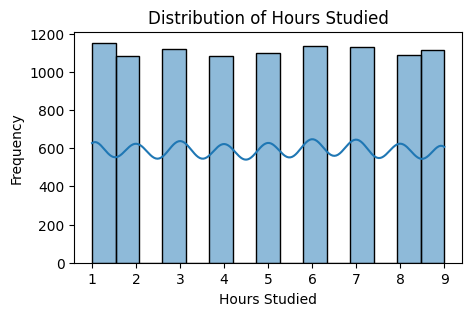

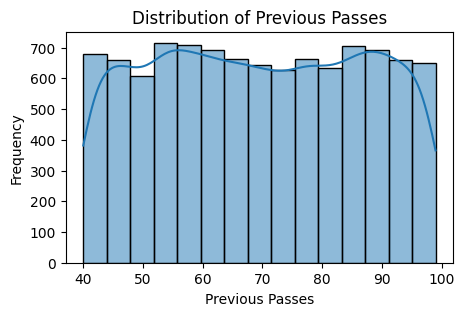

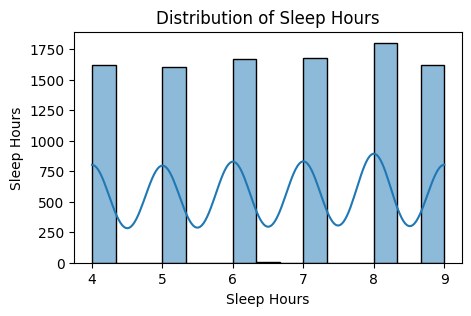

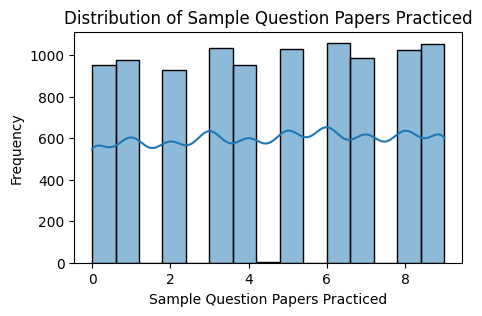

In [ ]:
# Distribution of Hours Studied
plt.figure(figsize=(5, 3))
sns.histplot(data_encoded['Hours Studied'], bins=15, kde=True)
plt.title('Distribution of Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Frequency')
plt.show()

# Distribution of Previous Scores
plt.figure(figsize=(5, 3))
sns.histplot(data_encoded['Previous Scores'], bins=15, kde=True)
plt.title('Distribution of Previous Passes')
plt.xlabel('Previous Passes')
plt.ylabel('Frequency')
plt.show()

# Distribution of Sleep Hours
plt.figure(figsize=(5, 3))
sns.histplot(data_encoded['Sleep Hours'], bins=15, kde=True)
plt.title('Distribution of Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Sleep Hours')
plt.show()

# Distribution of Sample Question Papers Practiced
plt.figure(figsize=(5, 3))
sns.histplot(data_encoded['Sample Question Papers Practiced'], bins=15, kde=True)
plt.title('Distribution of Sample Question Papers Practiced')
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Frequency')
plt.show()

**Correlation Heatmap**

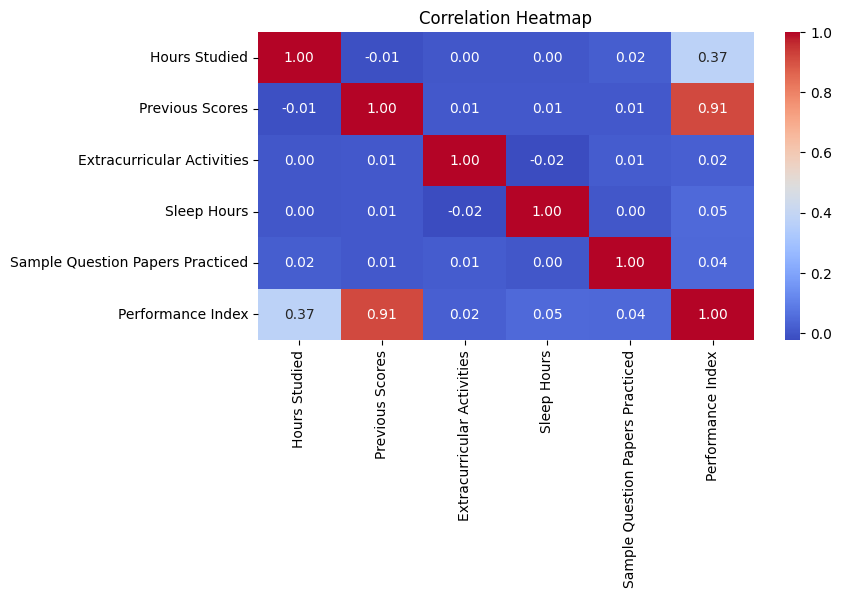

In [ ]:
# Select only numeric columns
numeric_data = data_encoded.select_dtypes(include=[np.number])
# Correlation heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


Simple Linear Regression - Hours Studied:
R²: 0.13
Adjusted R²: 0.13
MAE: 15.56
MSE: 320.96
RMSE: 17.92
Intercept (β0): 41.1601
Coefficients (β1, β2, ...): [2.79464704]

Simple Linear Regression - Previous Scores:
R²: 0.84
Adjusted R²: 0.84
MAE: 6.62
MSE: 59.90
RMSE: 7.74
Intercept (β0): -15.2517
Coefficients (β1, β2, ...): [1.01524919]

Polynomial Regression (Degree 2) - Hours Studied:
R²: 0.13
Adjusted R²: 0.13
MAE: 15.56
MSE: 320.85
RMSE: 17.91
Intercept (β0): 40.8008
Coefficients (β1, β2, ...): [ 0.          2.99165419 -0.01973557]

Polynomial Regression (Degree 10) - Hours Studied:
R²: 0.13
Adjusted R²: 0.12
MAE: 15.59
MSE: 322.33
RMSE: 17.95
Intercept (β0): 374430.0766
Coefficients (β1, β2, ...): [ 0.00000000e+00 -6.51892580e+05  5.78318431e+04  5.69408861e+05
 -5.34266777e+05  2.36963467e+05 -6.12567386e+04  9.70741935e+03
 -9.29908088e+02  4.94684692e+01 -1.12222886e+00]

Multiple Linear Regression - Hours Studied and Previous Scores:
R²: 0.99
Adjusted R²: 0.99
MAE: 1.83
MSE: 5

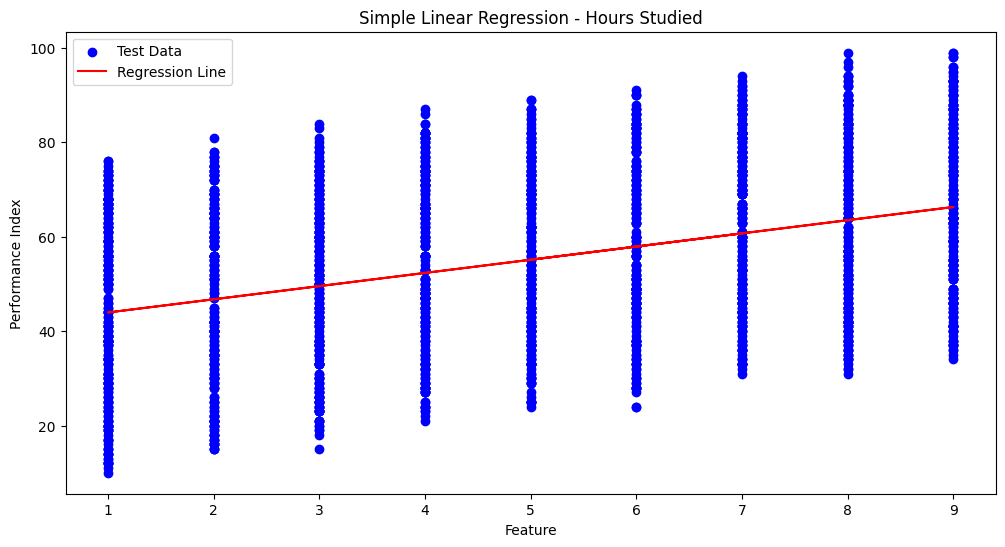

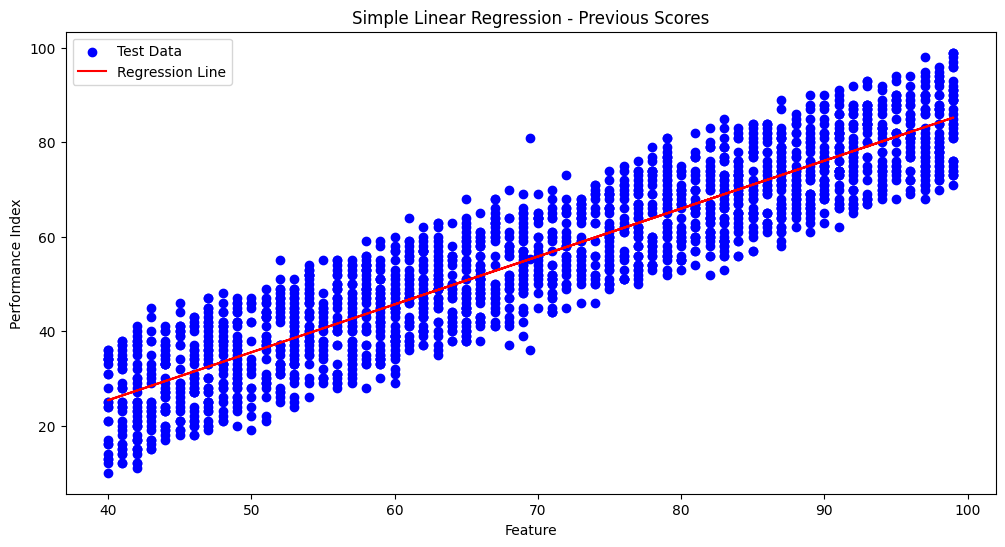

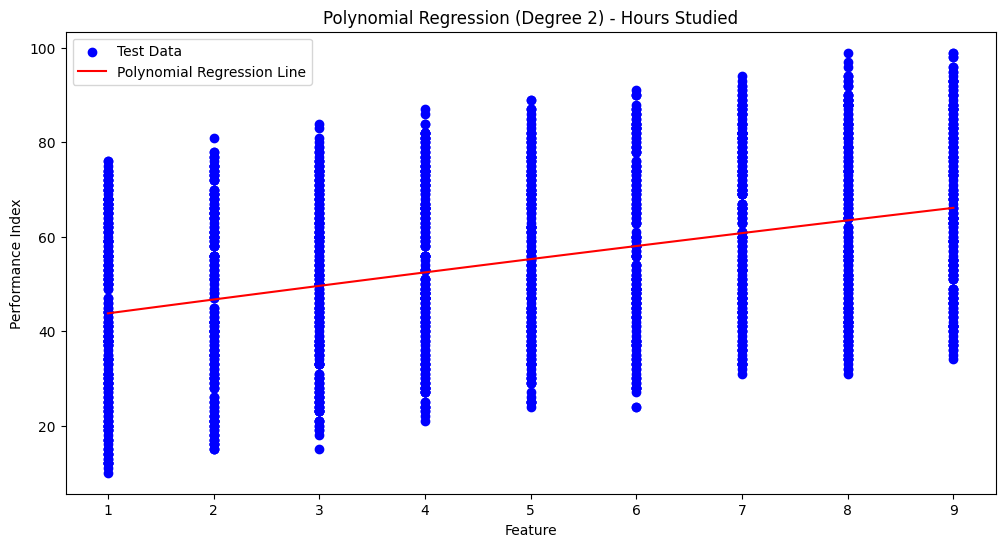

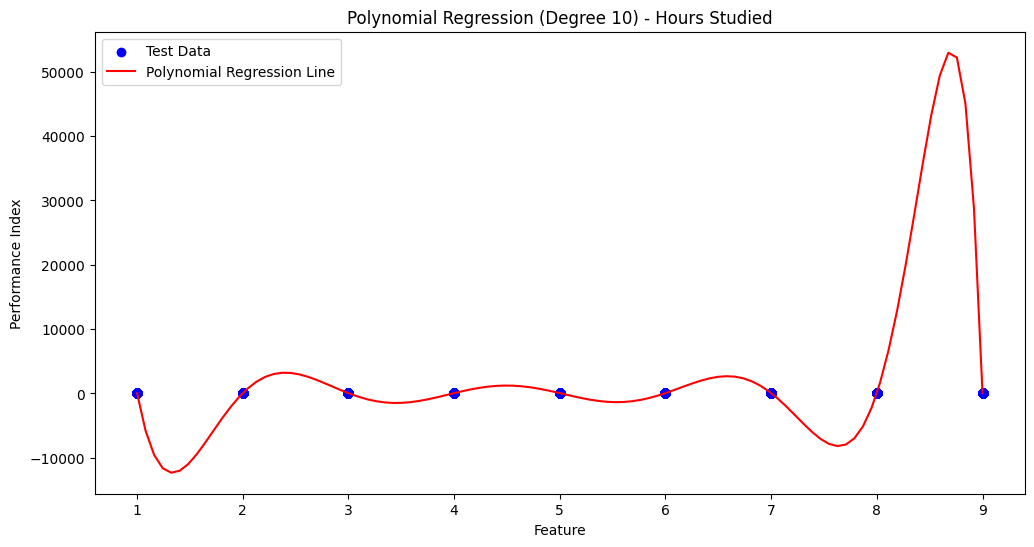

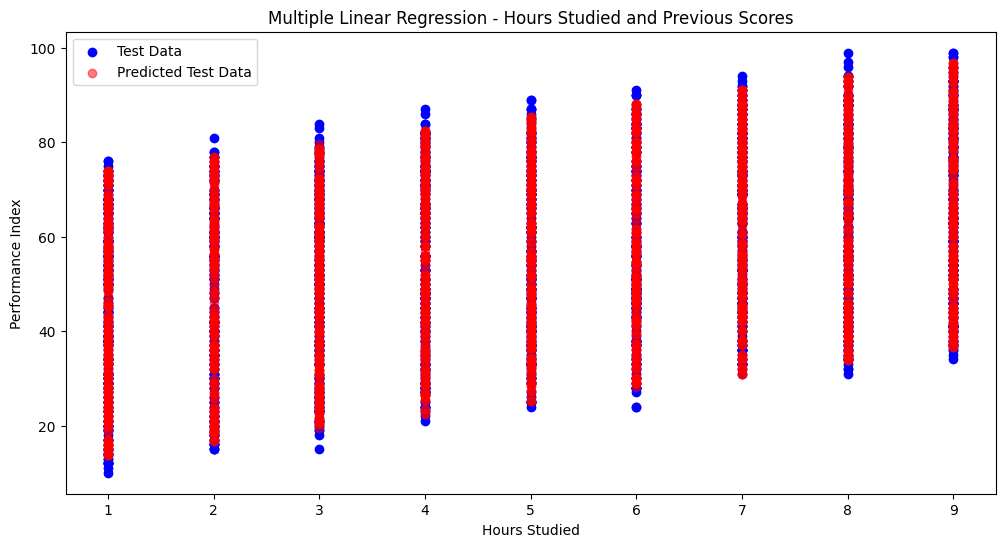

In [ ]:
# Split data into training and testing sets
X_studyhours = data_imputed[['Hours Studied']]
X_scores = data_imputed[['Previous Scores']]
X_combined = data_imputed[['Hours Studied', 'Previous Scores']]
y = data_imputed['Performance Index']

# Split the dataset into training and testing sets
# test_size=0.2 specifies 20% of the data will be used for testing
# random_state=42 ensures reproducibility of the split
X_studyhours_train, X_studyhours_test, y_train, y_test = train_test_split(X_studyhours, y, test_size=0.2, random_state=42)
X_scores_train, X_scores_test, _, _ = train_test_split(X_scores, y, test_size=0.2, random_state=42)
X_combined_train, X_combined_test, _, _ = train_test_split(X_combined, y, test_size=0.2, random_state=42)

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_test = model.predict(X_test)

    # Calculate performance metrics
    r2 = r2_score(y_test, y_pred_test)
    adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    mae = mean_absolute_error(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)

    # Output results
    print(f"R²: {r2:.2f}")
    print(f"Adjusted R²: {adj_r2:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")

    # Print the intercept (β0) and coefficients (β1, β2, ...)
    if hasattr(model, 'intercept_'):
        print(f"Intercept (β0): {model.intercept_:.4f}")
    if hasattr(model, 'coef_'):
        print("Coefficients (β1, β2, ...):", model.coef_)

    return y_pred_test

# 1. Predict Performance Index based on Hours Studied using simple regression
print("Simple Linear Regression - Hours Studied:")
model_studyhours = LinearRegression()
y_pred_test_studyhours = evaluate_model(model_studyhours, X_studyhours_train, X_studyhours_test, y_train, y_test)

# 2. Predict Performance Index based on Previous Scores using simple regression
print("\nSimple Linear Regression - Previous Scores:")
model_scores = LinearRegression()
y_pred_test_scores = evaluate_model(model_scores, X_scores_train, X_scores_test, y_train, y_test)

# 3. Predict Performance Index based on Hours Studied using polynomial regression (degree=2)
print("\nPolynomial Regression (Degree 2) - Hours Studied:")
# generate polynomial features from the original data, degree = 2, X+X^2
poly_2 = PolynomialFeatures(degree=2)
# fit_transform: fit=Learns the parameters from the data and tansform=applies the transformation.
X_studyhours_poly_2_train = poly_2.fit_transform(X_studyhours_train)
# For 'test data', only the transform method is applied, not fit_transform: fit=Learns the parameters from the data and tansform=applies the transformation.
X_studyhours_poly_2_test = poly_2.transform(X_studyhours_test)
model_poly_2 = LinearRegression()
y_pred_test_poly_2 = evaluate_model(model_poly_2, X_studyhours_poly_2_train, X_studyhours_poly_2_test, y_train, y_test)

# 4. Predict Performance Index based on Hours Studied using polynomial regression (degree=10)
print("\nPolynomial Regression (Degree 10) - Hours Studied:")
poly_10 = PolynomialFeatures(degree=10)
X_studyhours_poly_10_train = poly_10.fit_transform(X_studyhours_train)
X_studyhours_poly_10_test = poly_10.transform(X_studyhours_test)
model_poly_10 = LinearRegression()
y_pred_test_poly_10 = evaluate_model(model_poly_10, X_studyhours_poly_10_train, X_studyhours_poly_10_test, y_train, y_test)

# 5. Predict Performance Index based on Hours Studied and Previous Scores (multiple regression)
print("\nMultiple Linear Regression - Hours Studied and Previous Scores:")
model_combined = LinearRegression()
y_pred_test_combined = evaluate_model(model_combined, X_combined_train, X_combined_test, y_train, y_test)

# Visualize all cases
def plot_regression_results(X, y_test, y_pred_test, model, title, poly=False, degree=None):
    plt.figure(figsize=(12, 6))
    plt.scatter(X, y_test, color='blue', label='Test Data')
    if poly:
        X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        poly_features = PolynomialFeatures(degree=degree)
        X_line_poly = poly_features.fit_transform(X_line)
        y_line = model.predict(X_line_poly)
        plt.plot(X_line, y_line, color='red', label='Polynomial Regression Line')
    else:
        plt.plot(X, y_pred_test, color='red', label='Regression Line')
    plt.title(title)
    plt.xlabel('Feature')
    plt.ylabel('Performance Index')
    plt.legend()
    plt.show()

# Plotting results
plot_regression_results(X_studyhours_test, y_test, y_pred_test_studyhours, model_studyhours, 'Simple Linear Regression - Hours Studied')
plot_regression_results(X_scores_test, y_test, y_pred_test_scores, model_scores, 'Simple Linear Regression - Previous Scores')
plot_regression_results(X_studyhours_test, y_test, y_pred_test_poly_2, model_poly_2, 'Polynomial Regression (Degree 2) - Hours Studied', poly=True, degree=2)
plot_regression_results(X_studyhours_test, y_test, y_pred_test_poly_10, model_poly_10, 'Polynomial Regression (Degree 10) - Hours Studied', poly=True, degree=10)

# For multiple regression, we need to adjust the plotting function
def plot_multiple_regression_results(X_test, y_test, y_pred_test, title):
    plt.figure(figsize=(12, 6))
    plt.scatter(X_test['Hours Studied'], y_test, color='blue', label='Test Data')
    plt.scatter(X_test['Hours Studied'], y_pred_test, color='red', label='Predicted Test Data', alpha=0.5)
    plt.title(title)
    plt.xlabel('Hours Studied')
    plt.ylabel('Performance Index')
    plt.legend()
    plt.show()

plot_multiple_regression_results(X_combined_test, y_test, y_pred_test_combined, 'Multiple Linear Regression - Hours Studied and Previous Scores')


